In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
%matplotlib inline

1. data preparation

In [37]:
data_dir = r'D:\zzq\python_project\2415-final-project\GlobalLandTemperaturesByState.csv'

data = pd.read_csv(data_dir)
data.shape

(645675, 5)

In [38]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [39]:
# missing value
data.isna().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [40]:
# missing values corresponds to country
data.loc[data['AverageTemperature'].isna()]['Country'].value_counts()

United States    7815
Russia           6723
India            5044
Canada           3212
Brazil           1877
China             780
Australia         197
Name: Country, dtype: int64

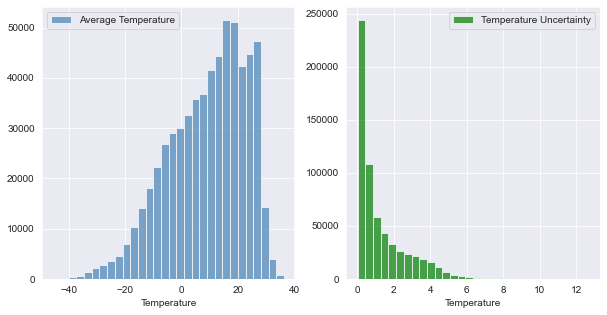

In [41]:
data['dt'] = pd.to_datetime(data['dt'], format='%Y-%d-%m')
data = data.set_index('dt')
# hist gram for temperature and uncertainty
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot histograms for 'AverageTemperature' and 'AverageTemperatureUncertainty'
axes[0].hist(data['AverageTemperature'], bins=30, color='steelblue', alpha=0.7, label='Average Temperature')
axes[0].set_xlabel('Temperature')
# axes[0].set_xlabel('Frequency')
axes[0].legend()

axes[1].hist(data['AverageTemperatureUncertainty'], bins=30, color='green', alpha=0.7, label='Average Temperature Uncertainty')
axes[1].set_xlabel('Temperature')
axes[1].legend()
plt.show()

In [60]:
# based on previous figures, we can decide to use medium to fill out the NAs for average temperature and use mean to fill out the NAs for temperature uncertainty
data['year'] = data.index.year
data['temperature'] = data.groupby(['year', 'Country'])['AverageTemperature'].transform(lambda x: x.fillna(x.median()))
data['error'] = data.groupby(['year', 'Country'])['AverageTemperatureUncertainty'].transform(lambda x: x.fillna(x.mean()))
data = data.sort_values(by=['Country', 'year']).fillna(method='ffill')
data.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
year                             0
temperature                      0
error                            0
dtype: int64

2. Global temperature

In [43]:
# make new df
data_temp = data[['Country', 'year', 'temperature', 'error']].copy()
data1 = data_temp.groupby(by=['Country', 'year']).mean(numeric_only=True).reset_index()
data1.columns = ['Country', 'Year', 'Temperature', 'Error']
data1.head()

,Country,Year,Temperature,Error
0,Australia,1841,14.190917,2.149917
1,Australia,1842,14.146267,1.831900
2,Australia,1843,14.479300,1.769267
3,Australia,1844,13.792167,1.786983
4,Australia,1845,14.266500,1.867350


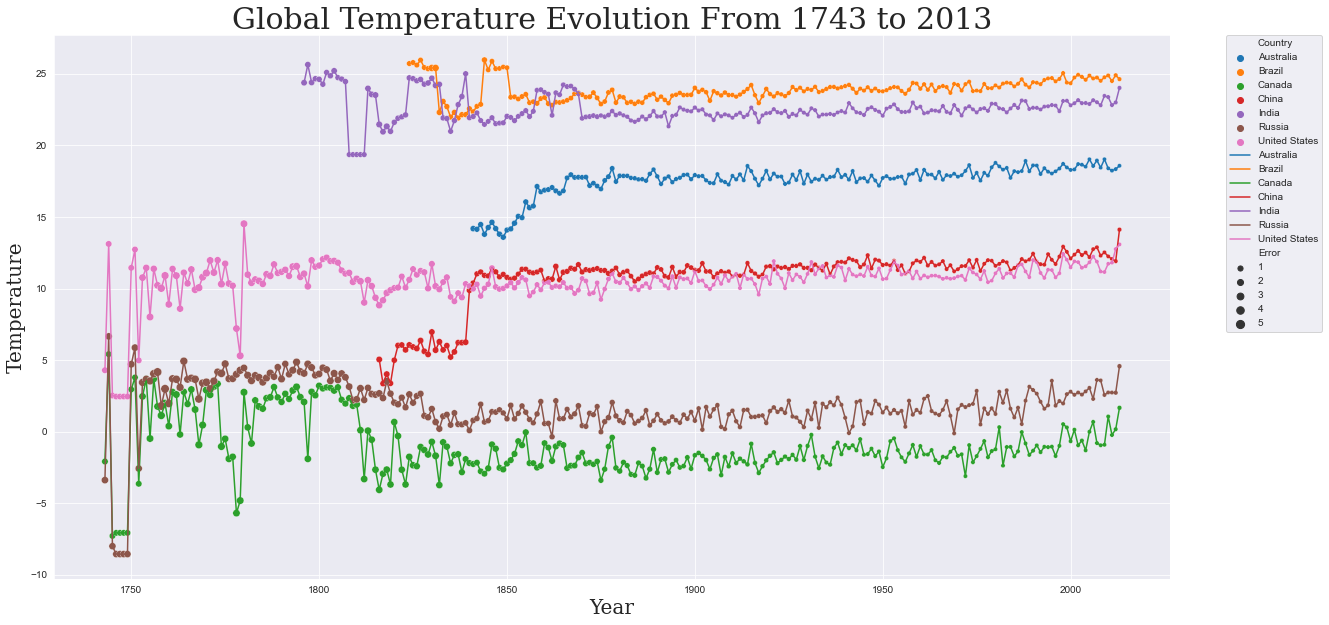

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
# plt.figure(figsize=(10,10))
plot1 = sns.scatterplot(data=data1, x='Year', y='Temperature', hue='Country', size='Error', ax=ax)
plot2 = sns.lineplot(data=data1, x='Year', y='Temperature', hue='Country', ax=ax)

# handle the legends error
h1,l1 = ax.get_legend_handles_labels()

h2 = []
l2 = []
for i in range(len(h1)):
    if i <= 7:
        h2.append(h1[i])
        l2.append(l1[i])
    elif 7 < i <= 14:
        h2.append(h1[i+6])
        l2.append(l1[i+6])
    else:
        h2.append(h1[i-7])
        l2.append(l1[i-7])

plt.legend(handles=h2, labels=l2, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Global Temperature Evolution From 1743 to 2013', fontdict={'size': 30, 'family':'serif'}, loc='center')
plt.xlabel('Year', fontdict={'size': 20, 'family':'serif'})
plt.ylabel('Temperature', fontdict={'size': 20, 'family':'serif'})
plt.savefig(r'D:\zzq\python_project\2415-final-project\1.png', bbox_inches="tight", facecolor='white')
plt.show()

In [45]:
max(data1['Year'])

2013

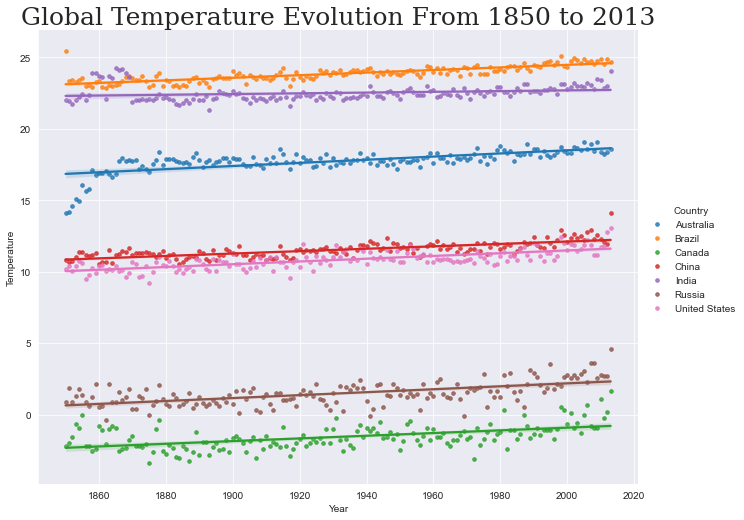

In [103]:
global_temperature_df = data1.loc[data1['Year'] >= 1850]

# create plot
sns.lmplot(data=global_temperature_df, x='Year', y='Temperature', hue='Country', height=7, aspect=1.3, scatter_kws={'s': 13})
plt.title('Global Temperature Evolution From 1850 to 2013', fontdict={'size': 25, 'family':'serif'}, loc='center')
plt.savefig(r'D:\zzq\python_project\2415-final-project\2.png', bbox_inches="tight", facecolor='white')
plt.show()

In [112]:
data111 = data1.loc[ (data1['Year'] == 2009)& (data1['Country']=='United States')]
data111

,Country,Year,Temperature,Error
1587,United States,2009,11.156327,0.220114


3. USA's temperature

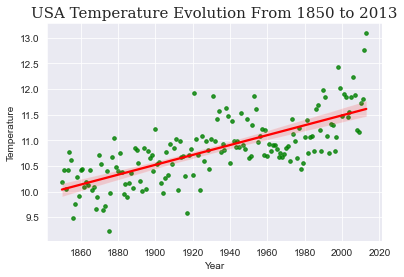

In [123]:
data_usa = data1.loc[(data1['Country']=='United States') & (data1['Year'] >= 1850)]
# aggregate on the year
data_usa_global = data_usa[['Year', 'Temperature']].groupby('Year').mean('Temperature').reset_index()
# draw scatterplot
sns.regplot(data=data_usa_global, x='Year', y='Temperature', line_kws={'color': 'red'}, scatter_kws={'s': 13, 'color': 'green'})
plt.title('USA Temperature Evolution From 1850 to 2013', fontdict={'size': 15, 'family':'serif'}, loc='center')
plt.savefig(r'D:\zzq\python_project\2415-final-project\3.png', bbox_inches="tight", facecolor='white')
plt.show()

In [119]:
# split years to a 5 equally separated timespans
data2 = data.drop(['AverageTemperature', 'AverageTemperatureUncertainty'], axis=1)
data2.columns = ['State', 'Country', 'Year', 'Temperature', 'Error']
data_usa1 = data2.loc[(data2['Country']=='United States') & (data2['Year'] >= 1850)]
data_usa1['Period'] = pd.cut(data_usa1['Year'], bins=5, labels=['1850-1882', '1883-1915', '1916-1947', '1948-1980', '1981-2013'])
data_usa1.head()

<ipython-input-119-1678a09f93fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa1['Period'] = pd.cut(data_usa1['Year'], bins=5, labels=['1850-1882', '1883-1915', '1916-1947', '1948-1980', '1981-2013'])


,State,Country,Year,Temperature,Error,Period
dt,,,,,,
1850-01-01,Alabama,United States,1850,11.393,2.027,1850-1882
1850-01-02,Alabama,United States,1850,9.454,1.941,1850-1882
1850-01-03,Alabama,United States,1850,12.959,3.230,1850-1882
1850-01-04,Alabama,United States,1850,15.925,2.721,1850-1882
1850-01-05,Alabama,United States,1850,20.330,1.505,1850-1882


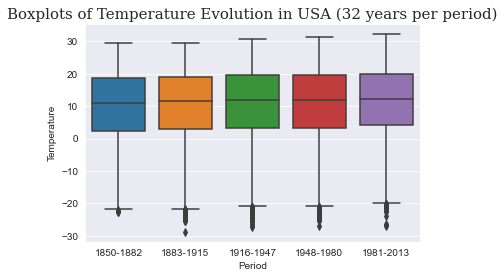

In [125]:
sns.boxplot(data=data_usa1, x='Period', y='Temperature')
plt.title('Boxplots of Temperature Evolution in USA (32 years per period)', fontdict={'size': 15, 'family':'serif'}, loc='center')
plt.savefig(r'D:\zzq\python_project\2415-final-project\4.png', bbox_inches="tight", facecolor='white')
plt.show()